# La Marató de TV3 (2023): SALUT SEXUAL I REPRODUCTIVA

## Web Scrapping de les Activitats Populars

### Part 1: Obtenir el llistat de comarques de totes les activitats populars solidàries

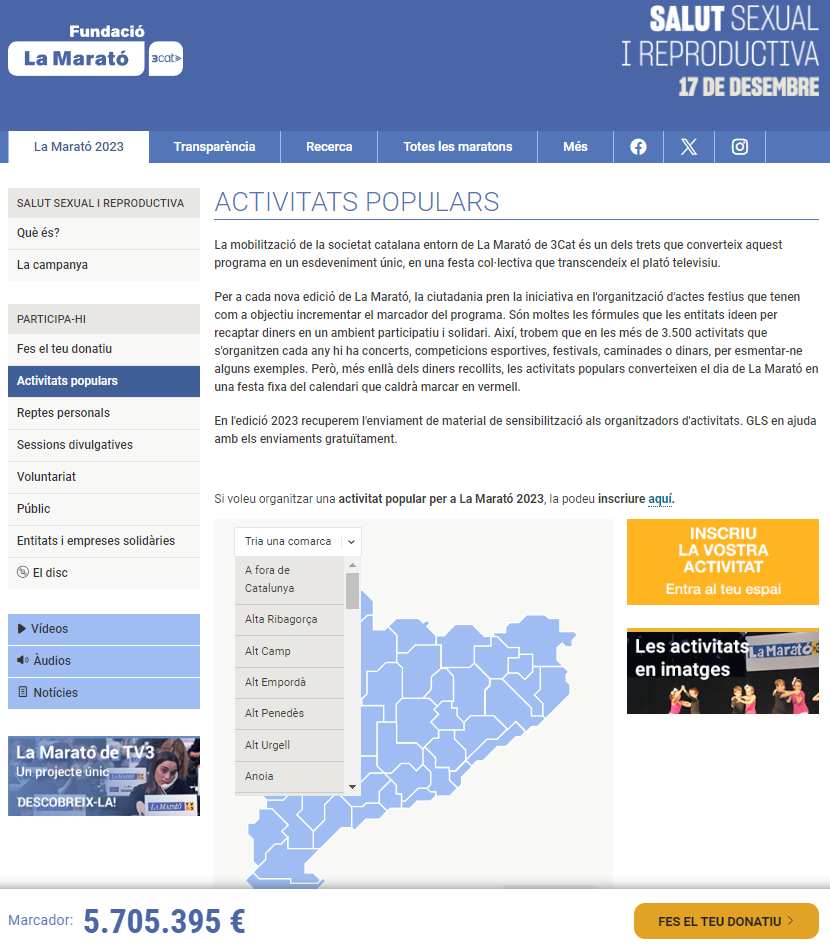

#### 1.1. Inicialitzem llibreries:

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json
import os

#### 1.2. Script d'scrapping sobre les comarques que organitzen activitats populars i el seus enllaços:

In [2]:
# URL de la pàgina web
url = "https://www.ccma.cat/tv3/marato/activitats-populars/2023/2590/"
response = requests.get(url)

# Verificar si la sol·licitud ha estat exitosa (codi 200)
if response.status_code == 200:
    # Crear un objecte BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Trobar l'element span amb la classe literal que contingui el text "Tria una comarca"
    span_comarques = soup.find('span', class_='literal', text='Tria una comarca')

    if span_comarques:
        # Obtindre els elements germans (comarques) de l'element span
        comarques = span_comarques.find_next('ul').find_all('li')

        # Emagatzemar les comarques amb els seus enllaços en un diccionari
        comarques_dict = {}
        for comarca in comarques:
            enllac = comarca.find('a')
            if enllac:
                nom_comarca = comarca.text.strip()
                href_comarca = enllac['href']  # Utilitzar directament ['href']
                if not href_comarca.startswith('http'):
                    # Afegir el prefix 'https:' si no comença amb 'http'
                    href_comarca = 'https:' + href_comarca
                comarques_dict[nom_comarca] = href_comarca

    else:
        print("No s'ha trobat l'element span amb la classe literal i el text 'Tria una comarca'")

else:
    print("Error en obtenir la pàgina:", response.status_code)


Finalment, obtenim el resultat emmagatzemats en un diccionari amb el seu respectiu enllaç:

In [3]:
print("Diccionari de Comarques enllaçades amb La Marató TV3 2023:\n")
for nom_comarca, href_comarca in comarques_dict.items():
    print(f"{nom_comarca}: {href_comarca}")

Diccionari de Comarques enllaçades amb La Marató TV3 2023:

A fora de Catalunya: https://www.ccma.cat/tv3/marato/activitats-populars/2023/fora-catalunya/2590/
Alta Ribagorça: https://www.ccma.cat/tv3/marato/activitats-populars/2023/alta-ribagorca/2590/
Alt Camp: https://www.ccma.cat/tv3/marato/activitats-populars/2023/alt-camp/2590/
Alt Empordà: https://www.ccma.cat/tv3/marato/activitats-populars/2023/alt-emporda/2590/
Alt Penedès: https://www.ccma.cat/tv3/marato/activitats-populars/2023/alt-penedes/2590/
Alt Urgell: https://www.ccma.cat/tv3/marato/activitats-populars/2023/alt-urgell/2590/
Anoia: https://www.ccma.cat/tv3/marato/activitats-populars/2023/anoia/2590/
Bages: https://www.ccma.cat/tv3/marato/activitats-populars/2023/bages/2590/
Baix Camp: https://www.ccma.cat/tv3/marato/activitats-populars/2023/baix-camp/2590/
Baix Ebre: https://www.ccma.cat/tv3/marato/activitats-populars/2023/baix-ebre/2590/
Baix Empordà: https://www.ccma.cat/tv3/marato/activitats-populars/2023/baix-emporda

### Part 2. Script d'scraping per obtenir informació sobre les comarques, organitzadors i activitats relacionades amb la Marató 2023.

- Mostrem un exemple d'unes de les comarques a inspeccionar: Baix Penedès

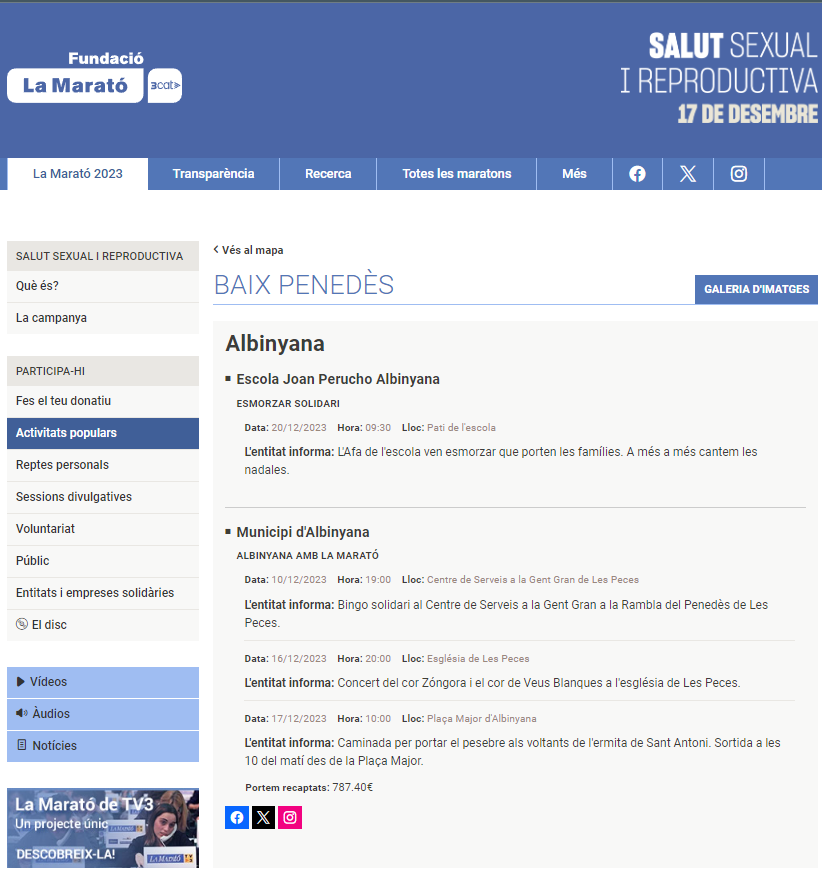

##### Consideracions a tenirm en compte

Objectiu a conseguir:

- Comarca: Baix Penedès
- Població: Albinyana
- Entitat organitzadora: Municipi d'Albinyana
- Nom de la programació: ALBINYANA AMB LA MARATÓ
    - Data: 10/12/2023
    - Hora: 19:00
    - Lloc: Centre de Serveis a la Gent Gran de Les Peces
    - L'entitat Informa: Bingo solidari al Centre de Serveis a la Gent Gran a la Rambla del Penedès de Les Peces.
    <br>,<br>
    - Data: 16/12/2023
    - Hora: 20:00
    - Lloc: Església de Les Peces
    - L'entita Informa: Concert del cor Zóngora i el cor de Veus Blanques a l'església de Les Peces.
    <br>,<br>
    [...]<br>
- Portem recaptats: 787.4€

##### JSON Data Schema:

In [4]:
# Exemple de pseudocòdi amb relació amb el que hem proposat just anteriorment amb Baix Penedès:

{
    "id comarca": {
        "id poblacio": {
            "nom de l'organitzador": {
                "Nom de la programacio": "ALBINYANA AMB LA MARATÓ",
                "Recaptacio": [
                    "787.4€"
                ],
                "Detalls_programacio_NumActivitats": [
                    {
                        "Data": "10/12/2023",
                        "Hora": "19:00",
                        "Lloc": "Centre de Serveis a la Gent Gran de Les Peces",
                        "Descripcio": "Bingo solidari al Centre de Serveis a la Gent Gran a la Rambla del Penedès de Les Peces."
                    },
                    {
                        "Data": "16/12/2023",
                        "Hora": "20:00",
                        "Lloc": "Església de Les Peces",
                        "Descripcio": "Concert del cor Zóngora i el cor de Veus Blanques a l'església de Les Peces"
                    }
                ]
            }
        }
    }           
}

{'id comarca': {'id poblacio': {"nom de l'organitzador": {'Nom de la programacio': 'ALBINYANA AMB LA MARATÓ',
    'Recaptacio': ['787.4€'],
    'Detalls_programacio_NumActivitats': [{'Data': '10/12/2023',
      'Hora': '19:00',
      'Lloc': 'Centre de Serveis a la Gent Gran de Les Peces',
      'Descripcio': 'Bingo solidari al Centre de Serveis a la Gent Gran a la Rambla del Penedès de Les Peces.'},
     {'Data': '16/12/2023',
      'Hora': '20:00',
      'Lloc': 'Església de Les Peces',
      'Descripcio': "Concert del cor Zóngora i el cor de Veus Blanques a l'església de Les Peces"}]}}}}

#### 3.1. Inicilització de dades i patrons

In [5]:
# Arxiu de dades on emmagatzemarem l'informació desitjable
json_data = {}

# Patró per extreure id de la comarca en qüestió
patro_web_comarca = r"https://www.ccma.cat/tv3/marato/activitats-populars/2023/([^/]+)/"

# Patrons regex per a Data, Hora, Lloc, entitat informa i Portem recaptatçs
patro_data = re.compile(r'Data:\s*(\d{2}/\d{2}/\d{4})')
patro_hora = re.compile(r'Hora:\s*(\d{2}:\d{2})')
patro_lloc = re.compile(r'Lloc:\s*(.*)')
patro_entitat_informa = re.compile(r"L'entitat informa:")
patro_portem_recaptats = re.compile(r'Portem recaptats:\s*(\d+€)')

#### 3.2. Script Web Scrapting Marató TV3 2023

In [6]:

# Iterarem sobre cada comarca en el diccionari comarques_dict, on es guarden les comarques i els seus enllaços associats.
for nom_comarca, href_comarca in comarques_dict.items():
    url = href_comarca
    response = requests.get(url) # Per a cada comarca, fa una sol·licitud HTTP a la URL corresponent i analitzar contingut HTML.

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        id_comarca = re.search(patro_web_comarca, url).group(1)
   
        # Trobar totes les activitat amb el grup de la comarca. Ex: aria-labelledby="fora-catalunya"
        llistat_programacio_DeLesOrganitzacions_comarcal = soup.find_all('section', attrs={'aria-labelledby':str(id_comarca)})
        
        # Protegim l'estructura de json a la clau inicial d'id_comarca
        if id_comarca not in json_data:
            json_data[id_comarca] = {}
            
        print(f"\n################################### INICI: {nom_comarca} ###############################################")
        print(f"Comarca: {nom_comarca}\nid_comarca: {id_comarca}\nURL: {url}\n")

        # Iterar sobre les seccions trobades
        for programacio_organitzacio in llistat_programacio_DeLesOrganitzacions_comarcal:
            dic_programacio_activitat = {'Data': [], 'Hora': [], 'Lloc': [], 'Descripcio': [],'Portem recaptats': []}
            
            # Objectiu: text h1: h1_id + nom població. Ex: <h1 id="banyoles">Banyoles</h1>
            h1_element = programacio_organitzacio.find('h1')
            id_poblacio = programacio_organitzacio.find('h1')['id']
            h1_nom_poblacio = h1_element.text.strip() if h1_element else None

            # Obtenir el text de l'element h2. Ex: <h2 id="ampa-escola-can-puig" aria-labelledby="banyoles">AMPA Escola Can Puig</h2>
            h2_element = programacio_organitzacio.find('h2')
            h2_nom_organitzador = h2_element.text.strip() if h2_element else None

            # Obtenir el text de l'element div (activitat). Ex: tot el text de l'activitat en qüestió a <div class:"activitats"...</div>>
            div_element = programacio_organitzacio.find('div', class_='entitat')
            div_text = div_element.text.strip().replace('\n', ' ')
            div_programacio = re.sub(r'\s{2,}(.*)$', '\n', div_text) if div_element else None
    
            # Extreure títol/nom de la programació general de l'entitat organitzadora en qüestió
            nom_programacio = div_programacio.split('\n')[0]
            

            # Itera sobre cada element de l'array i busca coincidències amb els patrons
            array_text = [element.get_text(strip=False) for element in div_element.select('dl')]
            for text in array_text:
                coincidencia_data = patro_data.search(text)
                coincidencia_hora = patro_hora.search(text)
                coincidencia_lloc = patro_lloc.search(text)
                coincidencia_portem_recaptats = patro_portem_recaptats.search(text)

                # Afegeix els resultats al diccionari si hi ha coincidències
                if coincidencia_data:
                    dic_programacio_activitat['Data'].append(coincidencia_data.group(1))
                else:
                    dic_programacio_activitat['Data'].append('')
                if coincidencia_hora:
                    dic_programacio_activitat['Hora'].append(coincidencia_hora.group(1))
                else:
                    dic_programacio_activitat['Hora'].append('')
                if coincidencia_lloc:
                    dic_programacio_activitat['Lloc'].append(coincidencia_lloc.group(1))
                else:
                    dic_programacio_activitat['Lloc'].append('')
                if coincidencia_portem_recaptats:
                    recaptacio = coincidencia_portem_recaptats.group(1) if coincidencia_portem_recaptats else None
                    dic_programacio_activitat['Portem recaptats'].append(recaptacio)

        
            # Itera sobre cada element de l'array
            array_descripcions = [element.get_text(strip=True) for element in div_element.select('p')]
            for descripcio in array_descripcions:
                descripcio_sense_entitat = patro_entitat_informa.sub('', descripcio).strip() # Suprimeix "L'entitat informa:"
                descripcio_sense_entitat = re.sub(r'\x92', "'", descripcio_sense_entitat)
                
                # Afegeix els resultats al diccionari si hi ha descripció:
                if descripcio_sense_entitat:
                    dic_programacio_activitat['Descripcio'].append(descripcio_sense_entitat)
            
            
            # Protegim l'estructura de json i crearem l'estrctura de clau-valor: id_comarca,id_poblacio,h2_nom_organitzador
            if id_comarca not in json_data:
                json_data[id_comarca] = {}

            if id_poblacio not in json_data[id_comarca]:
                json_data[id_comarca][id_poblacio] = {}

            if h2_nom_organitzador not in json_data[id_comarca][id_poblacio]:
                json_data[id_comarca][id_poblacio][h2_nom_organitzador] = []
                
            """
            Hem de tenir en compte que, per cada Organització de programació solidaria poden haver més d'una activitat.
            Per tant, dintre de 'Detalls_programacio_NumActivitats' tindrem tantes activitat com el nom de l'organització
            ha planificat per aquesta Marató 2023. Així doncs, a cada activitat en qüestió trobarem la data,hora,lloc i descripció.
            """
            # Planificació del nombre d'activitat de cada organitzador
            json_data[id_comarca][id_poblacio][h2_nom_organitzador] = {
                "Nom_programacio": nom_programacio,
                "Recaptacio": dic_programacio_activitat["Portem recaptats"],
                "Detalls_programacio_NumActivitats": []

            }
        
            # Detallem les variables data,hora,lloc i descripció de cada activitat
            for idx_NumeroActivitat in range(len(array_descripcions)):
                detall_activitat = {
                    "Data": dic_programacio_activitat["Data"][idx_NumeroActivitat],
                    "Hora": dic_programacio_activitat["Hora"][idx_NumeroActivitat],
                    "Lloc": dic_programacio_activitat["Lloc"][idx_NumeroActivitat],
                    "Descripcio": dic_programacio_activitat["Descripcio"][idx_NumeroActivitat]
                }
                json_data[id_comarca][id_poblacio][h2_nom_organitzador]["Detalls_programacio_NumActivitats"].append(detall_activitat)

                
            # Prints
            recaptacio_data = dic_programacio_activitat.get('Portem recaptats', [])
            recaptacio = recaptacio_data[0] if recaptacio_data else None
            
            print("\n-------------------------------------------------------------------------------------------------------")
            print(f"\nPoblació: {h1_nom_poblacio}")
            print(f"Organitzador: {h2_nom_organitzador}")
            print(f"Nom de la programació: {nom_programacio}")
            print(f"Recaptació: {recaptacio}")
            for idx_NumeroActivitat in range(len(array_descripcions)):
                print(f"\tData: {dic_programacio_activitat['Data'][idx_NumeroActivitat]}")
                print(f"\tHora: {dic_programacio_activitat['Hora'][idx_NumeroActivitat]}")
                print(f"\tLloc: {dic_programacio_activitat['Lloc'][idx_NumeroActivitat]}")
                print(f"\tDescripció Activitat: {dic_programacio_activitat['Descripcio'][idx_NumeroActivitat]}\n")
            
        print(f"################################### FINAL: {nom_comarca} ###############################################\n")
    else:
        print("Error al obtenir la pàgina:", response.status_code)




################################### INICI: A fora de Catalunya ###############################################
Comarca: A fora de Catalunya
id_comarca: fora-catalunya
URL: https://www.ccma.cat/tv3/marato/activitats-populars/2023/fora-catalunya/2590/


-------------------------------------------------------------------------------------------------------

Població: Aneto (Montanuy)
Organitzador: Comissió de festes d'Aneto
Nom de la programació: Xocolatada popular i Bingo solidari
Recaptació: 180€
	Data: 16/12/2023
	Hora: 18:30
	Lloc: Bar Restaurant Nestuy (Aneto)
	Descripció Activitat: Xocolatada popular subvencionada per l'ajuntament del municipi de Montanuy i bingo solidari on s'oferirà coma premi cupons per bescanviar en els comerços del municipi. Ambdues activitats es duran a terme al Bar Restaurant Nestuy de la població d'Aneto.


-------------------------------------------------------------------------------------------------------

Població: Basilea
Organitzador: Centre Català d

### 4. Visualització schema JSON data

In [7]:
json_str = json.dumps(json_data, ensure_ascii=False, indent=4)

print(json_str)

{
    "fora-catalunya": {
        "aneto-montanuy": {
            "Comissió de festes d'Aneto": {
                "Nom_programacio": "Xocolatada popular i Bingo solidari",
                "Recaptacio": [
                    "180€"
                ],
                "Detalls_programacio_NumActivitats": [
                    {
                        "Data": "16/12/2023",
                        "Hora": "18:30",
                        "Lloc": "Bar Restaurant Nestuy (Aneto)",
                        "Descripcio": "Xocolatada popular subvencionada per l'ajuntament del municipi de Montanuy i bingo solidari on s'oferirà coma premi cupons per bescanviar en els comerços del municipi. Ambdues activitats es duran a terme al Bar Restaurant Nestuy de la població d'Aneto."
                    }
                ]
            }
        },
        "basilea": {
            "Centre Català de Basilea": {
                "Nom_programacio": "Dinar de Nadal i Caga Tió amb rifa solidària",
                "

### Part final: emmagatzemar JSON data

In [8]:
# Especifiqueu el nom de l'arxiu JSON
nom_arxiu = "dadesMaratoTV3.json"

In [9]:
# Guardarem el diccionari json_data en un arxiu JSON
with open(nom_arxiu, 'w', encoding='utf-8') as arxiu:
    json.dump(json_data, arxiu, ensure_ascii=False, indent=4)
directori_actual = os.getcwd()

print(f"Les dades s'han guardat a l'arxiu {nom_arxiu} al mateix directori que el notebook en qüestió: {directori_actual}")

Les dades s'han guardat a l'arxiu dadesMaratoTV3.json al mateix directori que el notebook en qüestió: C:\Users\Espadas\Desktop
